## Menu Items Association Using Apriori
#### Problem Statement: 
Let's say I'm trying to scale my cafe to a much bigger restaurant chain. Processes like - a tiny physical menu card, chef recommendations, food pairings, and manually having to manage orders may work for a smaller cafe but when it comes catering a restaurant chain, you'd need be able do all of this on an app without manual intervention.

What we are trying to achieve here is to identify associations between different menu items to optimize the overall menu. Understand which items are frequently ordered together and create bundled offerings or promotions to increase sales.Use associations to design special promotions or discounts.
I aslo believe that this will optimize the kitchen workflow by understanding associations between menu items and their preparation times. This can help in organizing the kitchen operations more efficiently.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
df = pd.read_csv('menuOrders.csv')

In [4]:
df

,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,ORDX0,490Rs,Bhuna - Chicken,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ORDX1,446Rs,Plain Rice,Bhuna - Chicken,,Special Fried Rice,Curry,Korma - Lamb,NaN,NaN,NaN
2,ORDX2,465Rs,Plain Rice,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORDX3,1126Rs,Bhuna - Chicken,House white wine 75cl,Special Fried Rice,Curry,Vindaloo - Prawn,NaN,NaN,NaN,NaN
4,ORDX4,435Rs,Plain Rice,,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10995,ORDX10995,652Rs,Plain Rice,House white wine 75cl,Special Fried Rice,Vindaloo - Prawn,NaN,NaN,NaN,NaN,NaN
10996,ORDX10996,769Rs,Bhuna - Chicken,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,NaN,NaN,NaN,NaN
10997,ORDX10997,685Rs,Plain Rice,,House white wine 75cl,Special Fried Rice,Korma - Lamb,NaN,NaN,NaN,NaN
10998,ORDX10998,485Rs,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,,Special Fried Rice,Curry,Vindaloo - Prawn,Korma - Lamb,NaN


In [5]:
print(df.size)
print('Columns: ', df.columns)

121000
Columns:  Index(['Transaction_ID', 'Customer_ID', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9'],
      dtype='object')


There seems to be a lot of missing values. Let's explore that.

In [6]:
df.isnull().sum()

Transaction_ID        0
Customer_ID           0
M1                    0
M2                    0
M3                 1553
M4                 3301
M5                 5279
M6                 7571
M7                 9601
M8                10696
M9                10966
dtype: int64

Can we look at dropping M7-M9 columns as it makes no sense to impute these values? 

In [7]:
menu_list = ['M7','M8','M9']
for r in menu_list:
    print(f'This is {r} and these are the value counts \n {df[r].value_counts()}')

This is M7 and these are the value counts 
 Korma - Lamb        771
Vindaloo - Prawn    415
Lamb Biryani        176
Curry                37
Name: M7, dtype: int64
This is M8 and these are the value counts 
 Korma - Lamb        223
Vindaloo - Prawn     71
Lamb Biryani         10
Name: M8, dtype: int64
This is M9 and these are the value counts 
 Korma - Lamb        33
Vindaloo - Prawn     1
Name: M9, dtype: int64


Dropping M9 column for now as it has very little values populated

In [8]:
df.drop(['M9'],axis=1,inplace = True)

Lets check out what are the items available on menu. Since M1, M2 have all rows populated, lets see if we can get unique values from there

In [9]:
nonZeroColums = pd.concat([df['M1'],df['M2']]).unique()
print(nonZeroColums)

['Bhuna - Chicken' 'Plain Rice' ' ' 'House white wine 75cl'
 'Chicken Tikka Balti' 'Special Fried Rice' 'Curry' 'Lamb Biryani'
 'Vindaloo - Prawn' 'Korma - Lamb']


In [10]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8'],
      dtype='object')

There's whitespace as one of values in the data. Let's replace all whitespaces with NaNs.

In [11]:
df = df.replace(' ', np.NaN)

What are some of most frequently ordered items? 

In [12]:
itemsOnMenu = pd.concat([df['M1'],df['M2']]).unique()
print(itemsOnMenu)

['Bhuna - Chicken' 'Plain Rice' nan 'House white wine 75cl'
 'Chicken Tikka Balti' 'Special Fried Rice' 'Curry' 'Lamb Biryani'
 'Vindaloo - Prawn' 'Korma - Lamb']


This would be much easier to calculate if we make columns of menu items against the orders.

In [13]:
for item in itemsOnMenu:
    if(item != np.NaN):
        df[item] = ''

In [14]:
dummies = pd.Series(df['M1'].unique()).str.get_dummies(sep=', ')
#dummy_df = series.str.get_dummies(sep=', ')
 
# Concatenate the dummies to original dataframe
df_merged = pd.concat([df, dummies], axis='columns')


In [15]:
pd.set_option('display.max_columns', None)
df_merged.head(10)

,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,Bhuna - Chicken,Plain Rice,NaN,House white wine 75cl,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
0,ORDX0,490Rs,Bhuna - Chicken,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ORDX1,446Rs,Plain Rice,Bhuna - Chicken,NaN,Special Fried Rice,Curry,Korma - Lamb,NaN,NaN,,,,,,,,,,,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ORDX2,465Rs,Plain Rice,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ORDX3,1126Rs,Bhuna - Chicken,House white wine 75cl,Special Fried Rice,Curry,Vindaloo - Prawn,NaN,NaN,NaN,,,,,,,,,,,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ORDX4,435Rs,Plain Rice,NaN,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,,,,,,,,,,,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ORDX5,1328Rs,Bhuna - Chicken,NaN,Special Fried Rice,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,ORDX6,1225Rs,NaN,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,ORDX7,997Rs,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,Korma - Lamb,NaN,,,,,,,,,,,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,ORDX8,638Rs,House white wine 75cl,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,ORDX9,823Rs,Plain Rice,NaN,Lamb Biryani,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_merged.columns

Index([       'Transaction_ID',           'Customer_ID',
                          'M1',                    'M2',
                          'M3',                    'M4',
                          'M5',                    'M6',
                          'M7',                    'M8',
             'Bhuna - Chicken',            'Plain Rice',
                           nan, 'House white wine 75cl',
         'Chicken Tikka Balti',    'Special Fried Rice',
                       'Curry',          'Lamb Biryani',
            'Vindaloo - Prawn',          'Korma - Lamb',
             'Bhuna - Chicken',   'Chicken Tikka Balti',
                       'Curry', 'House white wine 75cl',
                'Lamb Biryani',            'Plain Rice',
          'Special Fried Rice',      'Vindaloo - Prawn'],
      dtype='object')

Not sure why I'm getting duplicate columns. Is it because of seperator? But when I try to drop the duplicate columns, all the columns dummified get dropped.

In [17]:
def conditions1(df):
    if (df["M1"] == "Bhuna - Chicken") or (df["M2"] == "Bhuna - Chicken") or (df["M3"] == "Bhuna - Chicken") or (df["M4"] == "Bhuna - Chicken") or (df["M5"] == "Bhuna - Chicken") or (df["M6"] == "Bhuna - Chicken") or (df["M7"] == "Bhuna - Chicken") or (df["M8"] == "Bhuna - Chicken"):
        return "Bhuna - Chicken"
    else:
        return np.NaN

# Chicken Tikka Balti
def conditions2(df):
    if (df["M1"] == "Chicken Tikka Balti") or (df["M2"] == "Chicken Tikka Balti") or (df["M3"] == "Chicken Tikka Balti") or (df["M4"] == "Chicken Tikka Balti") or (df["M5"] == "Chicken Tikka Balti") or (df["M6"] == "Chicken Tikka Balti") or (df["M7"] == "Chicken Tikka Balti") or (df["M8"] == "Chicken Tikka Balti"):
        return "Chicken Tikka Balti"
    else:
        return np.NaN

# Curry
def conditions3(df):
    if (df["M1"] == "Curry") or (df["M2"] == "Curry") or (df["M3"] == "Curry") or (df["M4"] == "Curry") or (df["M5"] == "Curry") or (df["M6"] == "Curry") or (df["M7"] == "Curry") or (df["M8"] == "Curry"):
        return "Curry"
    else:
        return np.NaN

# House white wine 75cl
def conditions4(df):
    if (df["M1"] == "House white wine 75cl") or (df["M2"] == "House white wine 75cl") or (df["M3"] == "House white wine 75cl") or (df["M4"] == "House white wine 75cl") or (df["M5"] == "House white wine 75cl") or (df["M6"] == "House white wine 75cl") or (df["M7"] == "House white wine 75cl") or (df["M8"] == "House white wine 75cl"):
        return "House white wine 75cl"
    else:
        return np.NaN

# Korma - Lamb
def conditions5(df):
    if (df["M1"] == "Korma - Lamb") or (df["M2"] == "Korma - Lamb") or (df["M3"] == "Korma - Lamb") or (df["M4"] == "Korma - Lamb") or (df["M5"] == "Korma - Lamb") or (df["M6"] == "Korma - Lamb") or (df["M7"] == "Korma - Lamb") or (df["M8"] == "Korma - Lamb"):
        return "Korma - Lamb"
    else:
        return np.NaN

# Lamb Biryani
def conditions6(df):
    if (df["M1"] == "Lamb Biryani") or (df["M2"] == "Lamb Biryani") or (df["M3"] == "Lamb Biryani") or (df["M4"] == "Lamb Biryani") or (df["M5"] == "Lamb Biryani") or (df["M6"] == "Lamb Biryani") or (df["M7"] == "Lamb Biryani") or (df["M8"] == "Lamb Biryani"):
        return "Lamb Biryani"
    else:
        return np.NaN

# Plain Rice
def conditions7(df):
    if (df["M1"] == "Plain Rice") or (df["M2"] == "Plain Rice") or (df["M3"] == "Plain Rice") or (df["M4"] == "Plain Rice") or (df["M5"] == "Plain Rice") or (df["M6"] == "Plain Rice") or (df["M7"] == "Plain Rice") or (df["M8"] == "Plain Rice"):
        return "Plain Rice"
    else:
        return np.NaN

# Special Fried Rice
def conditions8(df):
    if (df["M1"] == "Special Fried Rice") or (df["M2"] == "Special Fried Rice") or (df["M3"] == "Special Fried Rice") or (df["M4"] == "Special Fried Rice") or (df["M5"] == "Special Fried Rice") or (df["M6"] == "Special Fried Rice") or (df["M7"] == "Special Fried Rice") or (df["M8"] == "Special Fried Rice"):
        return "Special Fried Rice"
    else:
        return np.NaN

# Vindaloo - Prawn
def conditions9(df):
    if (df["M1"] == "Vindaloo - Prawn") or (df["M2"] == "Vindaloo - Prawn") or (df["M3"] == "Vindaloo - Prawn") or (df["M4"] == "Vindaloo - Prawn") or (df["M5"] == "Vindaloo - Prawn") or (df["M6"] == "Vindaloo - Prawn") or (df["M7"] == "Vindaloo - Prawn") or (df["M8"] == "Vindaloo - Prawn"):
        return "Vindaloo - Prawn"
    else:
        return np.NaN


In [18]:
df['Bhuna - Chicken'] =  df.apply(conditions1, axis=1)
df['Chicken Tikka Balti'] =  df.apply(conditions2, axis=1)
df['Curry'] =  df.apply(conditions3, axis=1)
df['House white wine 75cl'] =  df.apply(conditions4, axis=1)
df['Korma - Lamb'] =  df.apply(conditions5, axis=1)
df['Lamb Biryani'] =  df.apply(conditions6, axis=1)
df['Plain Rice'] =  df.apply(conditions7, axis=1)
df['Special Fried Rice'] =  df.apply(conditions8, axis=1)
df['Vindaloo - Prawn'] =  df.apply(conditions9, axis=1)


In [19]:
df.head()

,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,Bhuna - Chicken,Plain Rice,NaN,House white wine 75cl,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb
0,ORDX0,490Rs,Bhuna - Chicken,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,Bhuna - Chicken,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,Korma - Lamb
1,ORDX1,446Rs,Plain Rice,Bhuna - Chicken,NaN,Special Fried Rice,Curry,Korma - Lamb,NaN,NaN,Bhuna - Chicken,Plain Rice,,NaN,NaN,Special Fried Rice,Curry,NaN,NaN,Korma - Lamb
2,ORDX2,465Rs,Plain Rice,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plain Rice,,NaN,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN
3,ORDX3,1126Rs,Bhuna - Chicken,House white wine 75cl,Special Fried Rice,Curry,Vindaloo - Prawn,NaN,NaN,NaN,Bhuna - Chicken,NaN,,House white wine 75cl,NaN,Special Fried Rice,Curry,NaN,Vindaloo - Prawn,NaN
4,ORDX4,435Rs,Plain Rice,NaN,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,Plain Rice,,NaN,NaN,NaN,NaN,NaN,Vindaloo - Prawn,Korma - Lamb


Lets look at only the dishes column. I'm for now not considering the **House white wine 75cl, Transaction_ID, and Customer_ID** columns.

In [20]:
df_new = df[['Bhuna - Chicken', 'Chicken Tikka Balti','Curry','Korma - Lamb','Lamb Biryani','Plain Rice','Special Fried Rice','Vindaloo - Prawn']]
df_new.size


88000

Now get_dummies can be used to convert these categorical values to numerical ones

In [21]:
df_new = pd.get_dummies(df_new)
df_new.columns = ['Bhuna - Chicken', 'Chicken Tikka Balti', 'Curry','Korma - Lamb','Lamb Biryani','Plain Rice','Special Fried Rice','Vindaloo - Prawn']

df_new.head()
df_new.tail()

,Bhuna - Chicken,Chicken Tikka Balti,Curry,Korma - Lamb,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
10995,0,0,0,0,0,1,1,1
10996,1,1,1,0,1,0,1,0
10997,0,0,0,1,0,1,1,0
10998,1,1,1,1,0,1,1,1
10999,0,0,1,1,0,0,1,1


What are most frequently ordered items on the menu?


In [22]:
most_Ordered = df_new.sum( axis=0).sort_values(ascending=False)
most_Ordered = pd.DataFrame(most_Ordered)
most_Ordered = most_Ordered.reset_index()
most_Ordered.columns = ['Menu Items','Total orders']
most_Ordered

,Menu Items,Total orders
0,Plain Rice,5094
1,Curry,5092
2,Special Fried Rice,5082
3,Lamb Biryani,5035
4,Bhuna - Chicken,5005
5,Vindaloo - Prawn,4964
6,Chicken Tikka Balti,4934
7,Korma - Lamb,4819


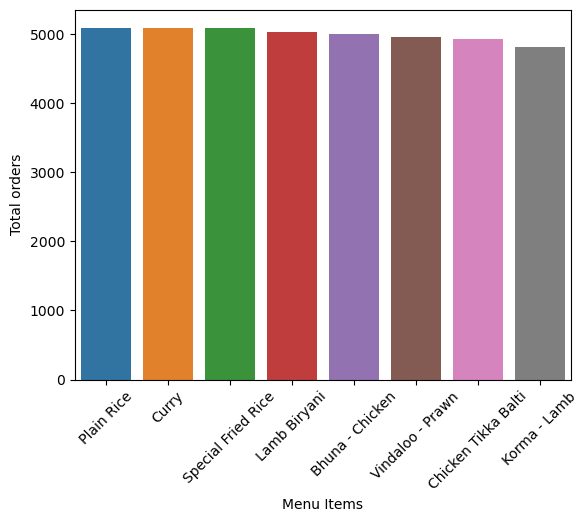

In [23]:
sns.barplot(x = most_Ordered['Menu Items'],
            y = most_Ordered['Total orders'],
            data = most_Ordered)
 
# Show the plot
plt.xticks(rotation=45)
plt.show()

In [24]:
frequent_items = apriori(df_new, min_support=0.1,use_colnames=True)
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
frequent_items.sort_values(by="support",ascending=False)


/Users/divyahegde/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
5,0.463091,(Plain Rice),1
2,0.462909,(Curry),1
6,0.462000,(Special Fried Rice),1
4,0.457727,(Lamb Biryani),1
0,0.455000,(Bhuna - Chicken),1
7,0.451273,(Vindaloo - Prawn),1
1,0.448545,(Chicken Tikka Balti),1
3,0.438091,(Korma - Lamb),1
23,0.218818,"(Plain Rice, Curry)",2
24,0.216455,"(Special Fried Rice, Curry)",2


In [25]:
frequent_items1 = apriori(df_new, min_support=0.15,use_colnames=True)
frequent_items1['length'] = frequent_items1['itemsets'].apply(lambda x: len(x))
frequent_items1.sort_values(by="support",ascending=False)


/Users/divyahegde/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
5,0.463091,(Plain Rice),1
2,0.462909,(Curry),1
6,0.462000,(Special Fried Rice),1
4,0.457727,(Lamb Biryani),1
0,0.455000,(Bhuna - Chicken),1
7,0.451273,(Vindaloo - Prawn),1
1,0.448545,(Chicken Tikka Balti),1
3,0.438091,(Korma - Lamb),1
23,0.218818,"(Plain Rice, Curry)",2
24,0.216455,"(Special Fried Rice, Curry)",2


Increasing the support only reduces the number of itemsets. Let's keep support at 0.1 since we're also getting 3 menu items combinations as well

In [26]:
rules = association_rules(frequent_items, metric='lift',min_threshold=0.5)
rules = rules.sort_values(['confidence','lift'],ascending=[False,False])
rules.size

1460

In [27]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
98,"(Lamb Biryani, Chicken Tikka Balti)",(Plain Rice),0.206909,0.463091,0.101636,0.491213,1.060726,0.005819,1.055272,0.072185
70,"(Bhuna - Chicken, Curry)",(Special Fried Rice),0.208182,0.462000,0.101455,0.487336,1.054840,0.005275,1.049421,0.065658
106,"(Special Fried Rice, Chicken Tikka Balti)",(Plain Rice),0.206636,0.463091,0.100545,0.486582,1.050726,0.004854,1.045754,0.060851
94,"(Chicken Tikka Balti, Curry)",(Plain Rice),0.212364,0.463091,0.103091,0.485445,1.048272,0.004747,1.043444,0.058465
124,"(Curry, Vindaloo - Prawn)",(Lamb Biryani),0.208636,0.457727,0.101091,0.484532,1.058560,0.005592,1.052000,0.069905


In [28]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
90,(Special Fried Rice),"(Plain Rice, Bhuna - Chicken)",0.462000,0.214727,0.100727,0.218024,1.015355,0.001523,1.004216,0.028109
108,(Special Fried Rice),"(Plain Rice, Chicken Tikka Balti)",0.462000,0.215273,0.100545,0.217631,1.010954,0.001089,1.003014,0.020140
89,(Plain Rice),"(Special Fried Rice, Bhuna - Chicken)",0.463091,0.213818,0.100727,0.217511,1.017270,0.001710,1.004719,0.031619
107,(Plain Rice),"(Special Fried Rice, Chicken Tikka Balti)",0.463091,0.206636,0.100545,0.217118,1.050726,0.004854,1.013389,0.089917
61,(Curry),"(Chicken Tikka Balti, Bhuna - Chicken)",0.462909,0.209636,0.100091,0.216222,1.031412,0.003048,1.008402,0.056705


From running the association_rules function, we observe that we are pretty confident (with a score of 0.49) that **if Chicken Tikka Balti and Lamb Biryani are ordered, then there is a high likelihood that plain rice will be ordered.**
We also see at the tail of the rules we have **Curry as antecedents and Bhuna - Chicken, Chicken Tikka Balti as consequents**


### What happens if we clean our data only to have certain price range menu items. 
#### For example, we want to decide what see what is the best combo offer we can offer under a certain price range.
#### Since wine was discarded at the beginning, can alcohol pairing be an option with combo?

## Combo offers data

Customer_ID seems to capture the amount per transaction

In [29]:
combo_df = df.copy()
combo_df.head()


,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,Bhuna - Chicken,Plain Rice,NaN,House white wine 75cl,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb
0,ORDX0,490Rs,Bhuna - Chicken,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,Bhuna - Chicken,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,Korma - Lamb
1,ORDX1,446Rs,Plain Rice,Bhuna - Chicken,NaN,Special Fried Rice,Curry,Korma - Lamb,NaN,NaN,Bhuna - Chicken,Plain Rice,,NaN,NaN,Special Fried Rice,Curry,NaN,NaN,Korma - Lamb
2,ORDX2,465Rs,Plain Rice,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plain Rice,,NaN,Chicken Tikka Balti,NaN,NaN,NaN,NaN,NaN
3,ORDX3,1126Rs,Bhuna - Chicken,House white wine 75cl,Special Fried Rice,Curry,Vindaloo - Prawn,NaN,NaN,NaN,Bhuna - Chicken,NaN,,House white wine 75cl,NaN,Special Fried Rice,Curry,NaN,Vindaloo - Prawn,NaN
4,ORDX4,435Rs,Plain Rice,NaN,Vindaloo - Prawn,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,Plain Rice,,NaN,NaN,NaN,NaN,NaN,Vindaloo - Prawn,Korma - Lamb


Converting Customer_ID to integer. Before that cleaning up the column values by removing 'Rs' in the end

In [30]:
combo_df['Customer_ID'] = combo_df['Customer_ID'].str.replace('Rs','')

In [31]:
combo_df['Customer_ID'] = combo_df['Customer_ID'].astype(int)

In [32]:
filteredCombo = combo_df.loc[(combo_df['Customer_ID']>=1300) & (combo_df['Customer_ID']<=1500)]
print(filteredCombo.size)
filteredCombo.head()
print(filteredCombo.columns)

21260
Index([       'Transaction_ID',           'Customer_ID',
                          'M1',                    'M2',
                          'M3',                    'M4',
                          'M5',                    'M6',
                          'M7',                    'M8',
             'Bhuna - Chicken',            'Plain Rice',
                           nan, 'House white wine 75cl',
         'Chicken Tikka Balti',    'Special Fried Rice',
                       'Curry',          'Lamb Biryani',
            'Vindaloo - Prawn',          'Korma - Lamb'],
      dtype='object')


In [33]:
def conditions1c(filteredCombo):
    if (filteredCombo["M1"] == "Bhuna - Chicken") or (filteredCombo["M2"] == "Bhuna - Chicken") or (filteredCombo["M3"] == "Bhuna - Chicken") or (filteredCombo["M4"] == "Bhuna - Chicken") or (filteredCombo["M5"] == "Bhuna - Chicken") or (filteredCombo["M6"] == "Bhuna - Chicken") or (filteredCombo["M7"] == "Bhuna - Chicken") or (filteredCombo["M8"] == "Bhuna - Chicken"):
        return "Bhuna - Chicken"
    else:
        return np.NaN

# Chicken Tikka Balti
def conditions2c(filteredCombo):
    if (filteredCombo["M1"] == "Chicken Tikka Balti") or (filteredCombo["M2"] == "Chicken Tikka Balti") or (filteredCombo["M3"] == "Chicken Tikka Balti") or (filteredCombo["M4"] == "Chicken Tikka Balti") or (filteredCombo["M5"] == "Chicken Tikka Balti") or (filteredCombo["M6"] == "Chicken Tikka Balti") or (filteredCombo["M7"] == "Chicken Tikka Balti") or (filteredCombo["M8"] == "Chicken Tikka Balti"):
        return "Chicken Tikka Balti"
    else:
        return np.NaN

# Curry
def conditions3c(filteredCombo):
    if (filteredCombo["M1"] == "Curry") or (filteredCombo["M2"] == "Curry") or (filteredCombo["M3"] == "Curry") or (filteredCombo["M4"] == "Curry") or (filteredCombo["M5"] == "Curry") or (filteredCombo["M6"] == "Curry") or (filteredCombo["M7"] == "Curry") or (filteredCombo["M8"] == "Curry"):
        return "Curry"
    else:
        return np.NaN

# House white wine 75cl
def conditions4c(filteredCombo):
    if (filteredCombo["M1"] == "House white wine 75cl") or (filteredCombo["M2"] == "House white wine 75cl") or (filteredCombo["M3"] == "House white wine 75cl") or (filteredCombo["M4"] == "House white wine 75cl") or (filteredCombo["M5"] == "House white wine 75cl") or (filteredCombo["M6"] == "House white wine 75cl") or (filteredCombo["M7"] == "House white wine 75cl") or (filteredCombo["M8"] == "House white wine 75cl"):
        return "House white wine 75cl"
    else:
        return np.NaN

# Korma - Lamb
def conditions5c(filteredCombo):
    if (filteredCombo["M1"] == "Korma - Lamb") or (filteredCombo["M2"] == "Korma - Lamb") or (filteredCombo["M3"] == "Korma - Lamb") or (filteredCombo["M4"] == "Korma - Lamb") or (filteredCombo["M5"] == "Korma - Lamb") or (filteredCombo["M6"] == "Korma - Lamb") or (filteredCombo["M7"] == "Korma - Lamb") or (filteredCombo["M8"] == "Korma - Lamb"):
        return "Korma - Lamb"
    else:
        return np.NaN

# Lamb Biryani
def conditions6c(filteredCombo):
    if (filteredCombo["M1"] == "Lamb Biryani") or (filteredCombo["M2"] == "Lamb Biryani") or (filteredCombo["M3"] == "Lamb Biryani") or (filteredCombo["M4"] == "Lamb Biryani") or (filteredCombo["M5"] == "Lamb Biryani") or (filteredCombo["M6"] == "Lamb Biryani") or (filteredCombo["M7"] == "Lamb Biryani") or (filteredCombo["M8"] == "Lamb Biryani"):
        return "Lamb Biryani"
    else:
        return np.NaN

# Plain Rice
def conditions7c(filteredCombo):
    if (filteredCombo["M1"] == "Plain Rice") or (filteredCombo["M2"] == "Plain Rice") or (filteredCombo["M3"] == "Plain Rice") or (filteredCombo["M4"] == "Plain Rice") or (filteredCombo["M5"] == "Plain Rice") or (filteredCombo["M6"] == "Plain Rice") or (filteredCombo["M7"] == "Plain Rice") or (filteredCombo["M8"] == "Plain Rice"):
        return "Plain Rice"
    else:
        return np.NaN

# Special Fried Rice
def conditions8c(filteredCombo):
    if (filteredCombo["M1"] == "Special Fried Rice") or (filteredCombo["M2"] == "Special Fried Rice") or (filteredCombo["M3"] == "Special Fried Rice") or (filteredCombo["M4"] == "Special Fried Rice") or (filteredCombo["M5"] == "Special Fried Rice") or (filteredCombo["M6"] == "Special Fried Rice") or (filteredCombo["M7"] == "Special Fried Rice") or (filteredCombo["M8"] == "Special Fried Rice"):
        return "Special Fried Rice"
    else:
        return np.NaN

# Vindaloo - Prawn
def conditions9c(filteredCombo):
    if (filteredCombo["M1"] == "Vindaloo - Prawn") or (filteredCombo["M2"] == "Vindaloo - Prawn") or (filteredCombo["M3"] == "Vindaloo - Prawn") or (filteredCombo["M4"] == "Vindaloo - Prawn") or (filteredCombo["M5"] == "Vindaloo - Prawn") or (filteredCombo["M6"] == "Vindaloo - Prawn") or (filteredCombo["M7"] == "Vindaloo - Prawn") or (filteredCombo["M8"] == "Vindaloo - Prawn"):
        return "Vindaloo - Prawn"
    else:
        return np.NaN


In [34]:
filteredCombo['Bhuna - Chicken'] =  filteredCombo.apply(conditions1c, axis=1)
filteredCombo['Chicken Tikka Balti'] =  filteredCombo.apply(conditions2c, axis=1)
filteredCombo['Curry'] =  filteredCombo.apply(conditions3c, axis=1)
filteredCombo['House white wine 75cl'] =  filteredCombo.apply(conditions4c, axis=1)
filteredCombo['Korma - Lamb'] =  filteredCombo.apply(conditions5c, axis=1)
filteredCombo['Lamb Biryani'] =  filteredCombo.apply(conditions6c, axis=1)
filteredCombo['Plain Rice'] =  filteredCombo.apply(conditions7c, axis=1)
filteredCombo['Special Fried Rice'] =  filteredCombo.apply(conditions8c, axis=1)
filteredCombo['Vindaloo - Prawn'] =  filteredCombo.apply(conditions9c, axis=1)

/var/folders/rx/0lw0w5ds7t36p51ggtr6fdr80000gn/T/ipykernel_31328/307165671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredCombo['Bhuna - Chicken'] =  filteredCombo.apply(conditions1c, axis=1)
/var/folders/rx/0lw0w5ds7t36p51ggtr6fdr80000gn/T/ipykernel_31328/307165671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredCombo['Chicken Tikka Balti'] =  filteredCombo.apply(conditions2c, axis=1)
/var/folders/rx/0lw0w5ds7t36p51ggtr6fdr80000gn/T/ipykernel_31328/307165671.py:3: SettingWithCopyWa

In [35]:
filteredCombo.head()

,Transaction_ID,Customer_ID,M1,M2,M3,M4,M5,M6,M7,M8,Bhuna - Chicken,Plain Rice,NaN,House white wine 75cl,Chicken Tikka Balti,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb
5,ORDX5,1328,Bhuna - Chicken,NaN,Special Fried Rice,NaN,NaN,NaN,NaN,NaN,Bhuna - Chicken,NaN,,NaN,NaN,Special Fried Rice,NaN,NaN,NaN,NaN
12,ORDX12,1353,Plain Rice,Bhuna - Chicken,Special Fried Rice,Korma - Lamb,NaN,NaN,NaN,NaN,Bhuna - Chicken,Plain Rice,,NaN,NaN,Special Fried Rice,NaN,NaN,NaN,Korma - Lamb
24,ORDX24,1367,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,NaN,House white wine 75cl,Vindaloo - Prawn,NaN,NaN,Bhuna - Chicken,Plain Rice,,House white wine 75cl,Chicken Tikka Balti,NaN,NaN,NaN,Vindaloo - Prawn,NaN
29,ORDX29,1300,NaN,Curry,Korma - Lamb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Curry,NaN,NaN,Korma - Lamb
31,ORDX31,1309,Bhuna - Chicken,Chicken Tikka Balti,NaN,House white wine 75cl,Lamb Biryani,Korma - Lamb,NaN,NaN,Bhuna - Chicken,NaN,,House white wine 75cl,Chicken Tikka Balti,NaN,NaN,Lamb Biryani,NaN,Korma - Lamb


In [36]:
filteredCombo.columns

Index([       'Transaction_ID',           'Customer_ID',
                          'M1',                    'M2',
                          'M3',                    'M4',
                          'M5',                    'M6',
                          'M7',                    'M8',
             'Bhuna - Chicken',            'Plain Rice',
                           nan, 'House white wine 75cl',
         'Chicken Tikka Balti',    'Special Fried Rice',
                       'Curry',          'Lamb Biryani',
            'Vindaloo - Prawn',          'Korma - Lamb'],
      dtype='object')

In [37]:
filteredCombo = filteredCombo[['Bhuna - Chicken', 'Chicken Tikka Balti','Curry','House white wine 75cl','Korma - Lamb','Lamb Biryani','Plain Rice','Special Fried Rice','Vindaloo - Prawn']]
filteredCombo

,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,Korma - Lamb,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
5,Bhuna - Chicken,NaN,NaN,NaN,NaN,NaN,NaN,Special Fried Rice,NaN
12,Bhuna - Chicken,NaN,NaN,NaN,Korma - Lamb,NaN,Plain Rice,Special Fried Rice,NaN
24,Bhuna - Chicken,Chicken Tikka Balti,NaN,House white wine 75cl,NaN,NaN,Plain Rice,NaN,Vindaloo - Prawn
29,NaN,NaN,Curry,NaN,Korma - Lamb,NaN,NaN,NaN,NaN
31,Bhuna - Chicken,Chicken Tikka Balti,NaN,House white wine 75cl,Korma - Lamb,Lamb Biryani,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10958,Bhuna - Chicken,NaN,Curry,NaN,Korma - Lamb,NaN,NaN,Special Fried Rice,Vindaloo - Prawn
10964,NaN,NaN,Curry,House white wine 75cl,NaN,Lamb Biryani,NaN,NaN,NaN
10966,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,NaN,NaN,Plain Rice,Special Fried Rice,NaN
10974,Bhuna - Chicken,Chicken Tikka Balti,Curry,NaN,NaN,NaN,Plain Rice,Special Fried Rice,NaN


In [38]:
filteredCombo = pd.get_dummies(filteredCombo)
filteredCombo.columns = ['Bhuna - Chicken', 'Chicken Tikka Balti', 'Curry','House white wine 75cl','Korma - Lamb','Lamb Biryani','Plain Rice','Special Fried Rice','Vindaloo - Prawn']
filteredCombo

,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,Korma - Lamb,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
5,1,0,0,0,0,0,0,1,0
12,1,0,0,0,1,0,1,1,0
24,1,1,0,1,0,0,1,0,1
29,0,0,1,0,1,0,0,0,0
31,1,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
10958,1,0,1,0,1,0,0,1,1
10964,0,0,1,1,0,1,0,0,0
10966,1,1,1,1,0,0,1,1,0
10974,1,1,1,0,0,0,1,1,0


In [39]:
frequent_items_c = apriori(filteredCombo, min_support=0.1,use_colnames=True)
frequent_items_c['length'] = frequent_items_c['itemsets'].apply(lambda x: len(x))
frequent_items_c.sort_values(by="support",ascending=False)


/Users/divyahegde/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
2,0.468485,(Curry),1
5,0.465663,(Lamb Biryani),1
7,0.453434,(Special Fried Rice),1
8,0.453434,(Vindaloo - Prawn),1
6,0.449671,(Plain Rice),1
3,0.444967,(House white wine 75cl),1
0,0.440263,(Bhuna - Chicken),1
4,0.435560,(Korma - Lamb),1
1,0.428975,(Chicken Tikka Balti),1
13,0.221072,"(Lamb Biryani, Bhuna - Chicken)",2


In [40]:
frequent_items_c = apriori(filteredCombo, min_support=0.1,use_colnames=True)
frequent_items_c['length'] = frequent_items_c['itemsets'].apply(lambda x: len(x))
frequent_items_c.sort_values(by="support",ascending=False)


/Users/divyahegde/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
2,0.468485,(Curry),1
5,0.465663,(Lamb Biryani),1
7,0.453434,(Special Fried Rice),1
8,0.453434,(Vindaloo - Prawn),1
6,0.449671,(Plain Rice),1
3,0.444967,(House white wine 75cl),1
0,0.440263,(Bhuna - Chicken),1
4,0.435560,(Korma - Lamb),1
1,0.428975,(Chicken Tikka Balti),1
13,0.221072,"(Lamb Biryani, Bhuna - Chicken)",2


I want only combos of 3 to support the price range set. Since the dataset chosen is small and limited, there will be very less difference in the association rules

In [41]:
frequent_items_c = frequent_items_c.loc[(frequent_items_c['support'] >= 0.1) & (frequent_items_c['support'] <= 0.11)]
frequent_items_c.head()

,support,itemsets,length
45,0.102540,"(Lamb Biryani, Chicken Tikka Balti, Bhuna - Ch...",3
47,0.104421,"(Lamb Biryani, House white wine 75cl, Bhuna - ...",3
48,0.100659,"(Lamb Biryani, Special Fried Rice, Bhuna - Chi...",3
49,0.106303,"(Lamb Biryani, Bhuna - Chicken, Vindaloo - Prawn)",3
50,0.101599,"(Korma - Lamb, Chicken Tikka Balti, Curry)",3


In [42]:
rules_c = association_rules(frequent_items_c, metric='lift',min_threshold=0.05,support_only=True)
rules_c = rules_c.sort_values(['confidence','lift'],ascending=[False,False])
rules_c.size

720

In [43]:
#rules_with = rules_c[rules_c['antecedents'] != 'House white wine 75cl' && rules_c['consequents'] != 'House white wine 75cl']
rules_c = rules_c.loc[(rules_c['antecedents'] != 'House white wine 75cl') & (rules_c['consequents'] != 'House white wine 75cl')]
rules_c.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Lamb Biryani, Chicken Tikka Balti)",(Bhuna - Chicken),NaN,NaN,0.10254,NaN,NaN,NaN,NaN,NaN
1,"(Lamb Biryani, Bhuna - Chicken)",(Chicken Tikka Balti),NaN,NaN,0.10254,NaN,NaN,NaN,NaN,NaN
2,"(Chicken Tikka Balti, Bhuna - Chicken)",(Lamb Biryani),NaN,NaN,0.10254,NaN,NaN,NaN,NaN,NaN
3,(Lamb Biryani),"(Chicken Tikka Balti, Bhuna - Chicken)",NaN,NaN,0.10254,NaN,NaN,NaN,NaN,NaN
4,(Chicken Tikka Balti),"(Lamb Biryani, Bhuna - Chicken)",NaN,NaN,0.10254,NaN,NaN,NaN,NaN,NaN


Using these combo rules, we can decide what best combos can be sold.